## Trabajo Práctico 3 - Probabilidad multidimensional

7. **(Para entregar)** Simular una variable aleatoria $X = (X_1, X_2)$ que sigue una distribución binormal con parámetros $\mu_1 = 2.3$,  $\mu_2 = 1.5$, $\sigma_1 = 1.2$, $\sigma_2 = 0.5$ y correlación $\rho = 0.7$. Repetir la simulación 1000 veces. Calcular la fracción de eventos caen en la elipse $1\sigma$ y comparar con la probabilidad contenida dentro de dicha región. Graficar 10 de los datos simulados junto a la elipse 1σ.

Nota: un punto $(x_1, x_2)$ pertenece a la elipse $r\sigma$ si la forma cuadrática asociada $q(x_1, x_2) ≤ r$.

Simulación:

In [1]:
import numpy as np
import danatools
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Parametros

mean_1 = 2.3  
mean_2 = 1.5
mean = np.array([mean_1, mean_2])

sigma_1 = 1.2
sigma_2 = 0.5

rho = 0.7
cov = danatools.covariance_matrix_2d(sigma_1, sigma_2, rho)
print(cov)

[[1.44 0.42]
 [0.42 0.25]]


In [52]:
# Simulación de 1000 valores de X
num_simulations = 1000
np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, num_simulations)

In [58]:
# Calcular la fracción de eventos que caen en la elipse 1σ

# Forma cuadrática
inv_cov = np.linalg.inv(cov)
V = X - mean
Q = np.einsum('ij,jk,ik->i', V, inv_cov, V)

# Fracción de eventos que caen en la elipse
fraction_in_ellipse = np.mean(Q <= 1)
print(f'Fracción de eventos en la elipse 1σ: {fraction_in_ellipse*100:.1f} %')


Fracción de eventos en la elipse 1σ: 39.1 %


La fracción de eventos dentro de la elipse $1 \sigma$ obtenida mediante la simulación coincide con la fracción teórica calculada a partir de una distribución $\chi^2_2$ con 2 grados de libertad, esto es, 39.3 %.

Gráfica:

In [60]:
# Distribución binomial

xx = np.linspace(mean_1 - 2.5*sigma_1, mean_1 + 2.5*sigma_1, num=100)
yy = np.linspace(mean_2 - 2.5*sigma_2, mean_2 + 2.5*sigma_2, num=100)
x, y = np.meshgrid(xx, yy)
pos = np.dstack((x, y))

from scipy.stats import multivariate_normal
z = multivariate_normal.pdf(pos, mean, cov)

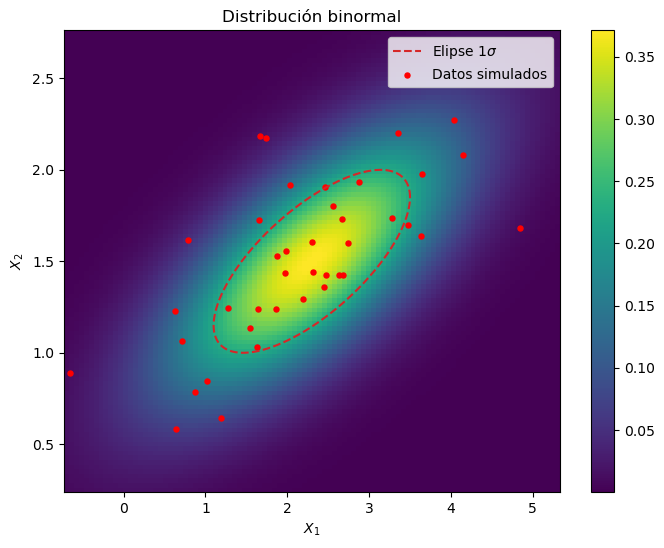

In [61]:
from matplotlib import cm

# Graficar algunos de los datos simulados junto a la elipse 1σ
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la densidad de probabilidad
density_plot = ax.pcolormesh(x, y, z, shading='auto', cmap=cm.viridis)
clb = plt.colorbar(density_plot)

# Graficar la elipse 1σ
ax.plot(*danatools.get_ellipse(mean, cov, nsigma=1), color='tab:red', ls='--', label='Elipse $1 \\sigma$')

# Graficar los algunos puntos simulados
ax.scatter(X[:40, 0], X[:40, 1], color='red', s=13, label='Datos simulados')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Distribución binormal')
ax.legend()

plt.show()